In [1]:
#Using PySpark to predict diabetis

# Using PySpark to predict diabetes

In [2]:
!pip install pyspark

  Using cached pyspark-3.4.0.tar.gz (310.8 MB)
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317161 sha256=83452d2c724cc650369871d314a76e43870622ea475266615cbbfd8b8fa7a30d
  Stored in directory: c:\users\n\appdata\local\pip\cache\wheels\9f\34\a4\159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [19]:
from pyspark.sql import SparkSession


In [21]:
#Reading the Diabetes dataset
# df = spark.read.csv(" C://Users//n//Downloads//archive//diabetes.csv", header =True, inferSchema =True)

from pyspark.sql import SparkSession
 
spark = SparkSession.builder.appName(
    'DiabetesPedictor').getOrCreate()
 
authors = spark.read.csv('C://Users//n//Downloads//archive//diabetes.csv', sep=',',
                         inferSchema=True, header=True)
 
df = authors.toPandas()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Python code implementation of the Apache Spark job using the Diabetes dataset

In [28]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.appName("DiabetesAnalysis").getOrCreate()

# Load the dataset into a Spark DataFrame
diabetes_df = spark.read.format("csv").option("header", "true").load("C://Users//n//Downloads//archive//diabetes.csv")

# Print the schema of the dataset
diabetes_df.printSchema()

root
 |-- Pregnancies: string (nullable = true)
 |-- Glucose: string (nullable = true)
 |-- BloodPressure: string (nullable = true)
 |-- SkinThickness: string (nullable = true)
 |-- Insulin: string (nullable = true)
 |-- BMI: string (nullable = true)
 |-- DiabetesPedigreeFunction: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Outcome: string (nullable = true)



In [29]:

# Check for missing values and drop rows with missing values
diabetes_df = diabetes_df.dropna()

# Convert the columns to appropriate data types
diabetes_df = diabetes_df.withColumn("Pregnancies", col("Pregnancies").cast("int"))
diabetes_df = diabetes_df.withColumn("Glucose", col("Glucose").cast("int"))
diabetes_df = diabetes_df.withColumn("BloodPressure", col("BloodPressure").cast("int"))
diabetes_df = diabetes_df.withColumn("SkinThickness", col("SkinThickness").cast("int"))
diabetes_df = diabetes_df.withColumn("Insulin", col("Insulin").cast("int"))
diabetes_df = diabetes_df.withColumn("BMI", col("BMI").cast("double"))
diabetes_df = diabetes_df.withColumn("DiabetesPedigreeFunction", col("DiabetesPedigreeFunction").cast("double"))
diabetes_df = diabetes_df.withColumn("Age", col("Age").cast("int"))
diabetes_df = diabetes_df.withColumn("Outcome", col("Outcome").cast("int"))

# Create a new DataFrame with only the necessary columns
selected_cols_df = diabetes_df.select("Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "Outcome")

# Generate descriptive statistics of the dataset
selected_cols_df.describe().show()

# Calculate the correlation matrix of the dataset
corr_matrix = selected_cols_df.select([col(c).cast("double") for c in selected_cols_df.columns]).toPandas().corr()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.952217567727642|115.24400235133803| 7.884160320375441|11.760231540678689| 0.476951377242799|
|    min|                 0|      

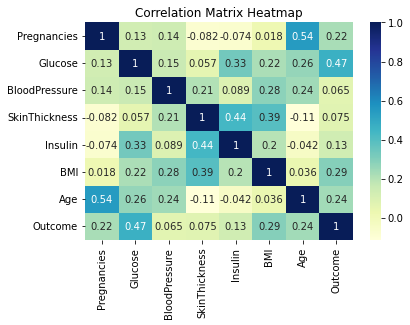

In [30]:
# Plot a heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix Heatmap")
plt.show()

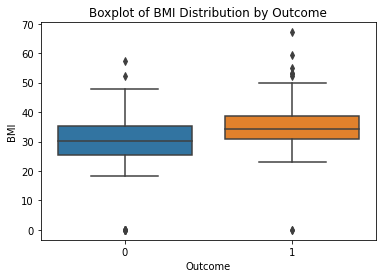

In [31]:

# Plot a boxplot of the BMI distribution by Outcome
sns.boxplot(x="Outcome", y="BMI", data=selected_cols_df.toPandas())
plt.title("Boxplot of BMI Distribution by Outcome")
plt.show()


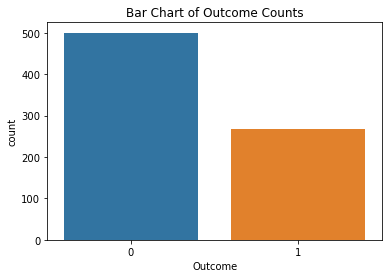

In [32]:
# Plot a bar chart of the count of each Outcome value
outcome_counts = selected_cols_df.groupBy("Outcome").count().toPandas()
sns.barplot(x="Outcome", y="count", data=outcome_counts)
plt.title("Bar Chart of Outcome Counts")
plt.show()

root
 |-- Pregnancies: string (nullable = true)
 |-- Glucose: string (nullable = true)
 |-- BloodPressure: string (nullable = true)
 |-- SkinThickness: string (nullable = true)
 |-- Insulin: string (nullable = true)
 |-- BMI: string (nullable = true)
 |-- DiabetesPedigreeFunction: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Outcome: string (nullable = true)

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|             

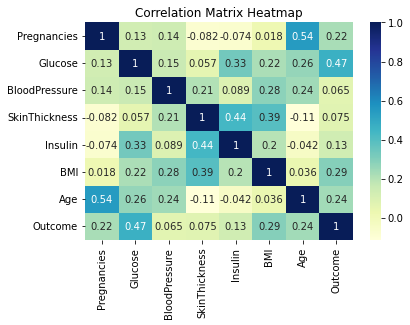

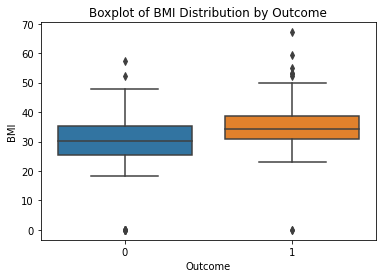

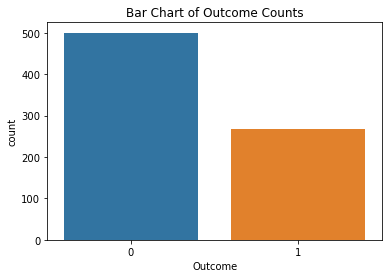

In [27]:





# Stop the SparkSession
spark.stop()


In [ ]:
#THE END